In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
def player_annotate(name, x_axis, y_axis, xytext, annotation, xycoords='data'):
    text = f"{name}\n({annotation})"

    plt.annotate(text=text,
                 xy = tuple(player_data[player_data['Player'] == name][[x_axis, y_axis]].values[0]),
                 xytext = xytext,
                 xycoords = xycoords,
                 arrowprops=dict(arrowstyle="-|>", \
                 connectionstyle="angle3", lw=1, color='black'), \
                 size=16, ha="center", color='black') 
    
def rectangle(*args, **kwargs):
    plt.gca().add_patch(mpatches.Rectangle(args, kwargs))

def create_grid(centre_point:tuple, xlim:tuple, ylim:tuple):
    plt.vlines(centre_point[0], ylim[0], ylim[1], linestyles='--', linewidth=2)
    plt.hlines(centre_point[1], xlim[0], xlim[1], linestyles='--', linewidth=2)
    
    rectangle((centre_point),(centre_point[0] - xlim[0])*-1, (ylim[1] - centre_point[1]), 
                                  capstyle='round', alpha=0.1, linestyle= '--', facecolor="sandybrown")
    
def create_grid(centre_point:tuple, xlim:tuple, ylim:tuple):
    plt.vlines(centre_point[0], ylim[0], ylim[1], linestyles='--', linewidth=2)
    plt.hlines(centre_point[1], xlim[0], xlim[1], linestyles='--', linewidth=2)
             
    top_left = mpatches.Rectangle((centre_point),(centre_point[0] - xlim[0])*-1, (ylim[1] - centre_point[1]), 
                                  capstyle='round', alpha=0.1, linestyle= '--', facecolor="sandybrown")
    plt.gca().add_patch(top_left)

    top_right = mpatches.Rectangle((centre_point), xlim[1] - centre_point[0], ylim[1] - centre_point[1],
                                   capstyle='round', alpha=0.1, linestyle= '--', facecolor="forestgreen")
    plt.gca().add_patch(top_right)
    
    bottom_left = mpatches.Rectangle((centre_point), (centre_point[0] - xlim[0])*-1, (centre_point[1]- ylim[0])*-1, 
                                     capstyle='round', alpha=0.1, 
                          linestyle= '--', facecolor="maroon")
    plt.gca().add_patch(bottom_left)

    bottom_right = mpatches.Rectangle((centre_point), xlim[1]-centre_point[0], (centre_point[1] - ylim[0])* -1, capstyle='round', alpha=0.1, 
                              linestyle= '--', facecolor="dodgerblue")
    
    plt.gca().add_patch(bottom_right)
    
    bezel = 0.03
    plt.annotate(text="Overpriced performers", xy=(xlim[1]*.015, ylim[1]*0.98), fontsize=16, weight='bold')
    plt.annotate(text="Good value performers", xy=(xlim[1]*.78, ylim[1]*0.98), fontsize=16, weight='bold')
    plt.annotate(text="Poor performers", xy=(xlim[1]*.015, centre_point[1]*.9), fontsize=16, weight='bold')
    plt.annotate(text="Underpriced players", xy=(xlim[1]*.81, centre_point[1]*.9), fontsize=16, weight='bold')

In [3]:
team_data = pd.read_csv(r"C:\Users\Terrafirma\OwnLearning\PremierLeague\team_stats.csv")
player_data = pd.read_csv(r"C:\Users\Terrafirma\OwnLearning\PremierLeague\player_stats.csv")
team_data.drop("Unnamed: 0", axis=1, inplace=True)
player_data.drop("Unnamed: 0", axis=1, inplace=True)
player_data['ROI'] = round(player_data['ROI'], 3)

In [4]:
player_data

,Team,Player,Position,Cost,Selected,Form,Pts,ROI
0,Arsenal,Smith Rowe,MID,6.1,27.4,3.7,81.0,13.279
1,Arsenal,Ramsdale,GKP,5.1,19.7,5.0,77.0,15.098
2,Arsenal,Gabriel,DEF,5.3,5.9,4.8,75.0,14.151
3,Arsenal,Saka,MID,6.3,10.6,4.8,71.0,11.270
4,Arsenal,Tomiyasu,DEF,4.8,6.3,5.7,68.0,14.167
...,...,...,...,...,...,...,...,...
575,Wolves,Jonny,DEF,4.5,0.0,0.0,0.0,0.000
576,Wolves,Mosquera,DEF,4.4,0.0,0.0,0.0,0.000
577,Wolves,Marques,DEF,4.0,0.2,0.0,0.0,0.000
578,Wolves,Bueno,DEF,4.0,0.0,0.0,0.0,0.000


In [5]:
team_data

,Team,Team_SPI,Team_attack_score,Team_defence_score,Opponent_SPI,Opponent_attack_score,Opponent_defence_score,Predicted_points,GF_likelihood,GA_likelihood
0,Burnley,65.3,1.8,0.9,70.775,1.975,0.800,4.83,1.000,0.456
1,Crystal Palace,71.8,1.9,0.7,65.200,1.775,0.875,6.19,1.025,0.394
2,Brighton,76.8,1.9,0.5,76.450,2.100,0.650,5.23,1.250,0.238
3,Arsenal,77.9,2.1,0.6,68.600,1.800,0.775,6.70,1.325,0.333
4,Leicester,72.2,2.1,0.9,82.375,2.500,0.500,3.84,1.600,0.360
5,Chelsea,88.7,2.6,0.4,72.625,1.875,0.650,8.13,1.950,0.213
6,Liverpool,92.9,3.1,0.3,68.425,1.925,0.900,9.53,2.200,0.156
7,Man. United,78.2,2.2,0.7,68.200,1.775,0.775,7.37,1.425,0.394
8,Aston Villa,73.4,2.0,0.7,72.575,2.050,0.775,5.36,1.225,0.341
9,West Ham,77.6,2.1,0.6,66.325,1.800,0.850,7.10,1.250,0.333


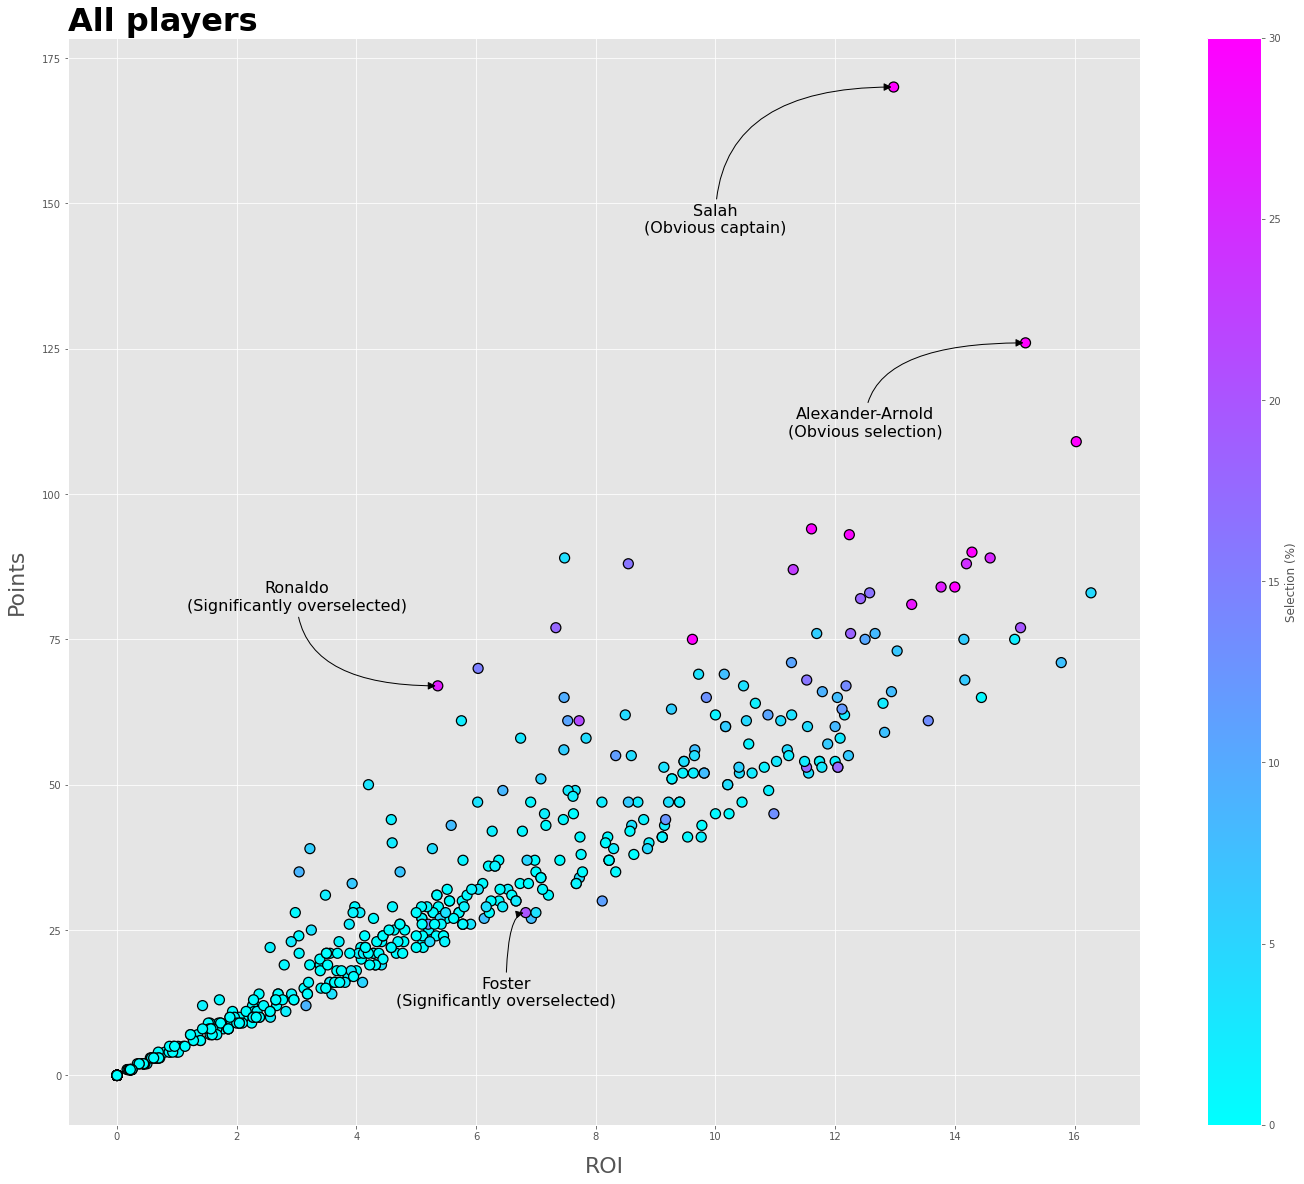

In [6]:
plt.figure(figsize=(24,20))
plt.style.use('ggplot')
plt.scatter(x=player_data['ROI'], y=player_data['Pts'], s=100, c=player_data['Selected'], vmax=30,
           edgecolors='black', linewidth=1.25, cmap='cool')
plt.colorbar(label='Selection (%)')

player_annotate(name='Foster', x_axis='ROI', y_axis='Pts', xytext=(6.5,12),
                annotation= "Significantly overselected")

player_annotate(name='Alexander-Arnold', x_axis='ROI', y_axis='Pts', xytext=(12.5, 110),
                annotation= "Obvious selection")

player_annotate(name='Salah', x_axis='ROI', y_axis='Pts', xytext=(10, 145),
                annotation= "Obvious captain")

player_annotate(name='Ronaldo', x_axis='ROI', y_axis='Pts', xytext=(3, 80),
                annotation= "Significantly overselected")

plt.xlabel("ROI", fontsize=22, labelpad=15)
plt.ylabel("Points", fontsize=22, labelpad=15)
plt.title("All players", loc='left', weight='bold', fontsize="32")
plt.show()

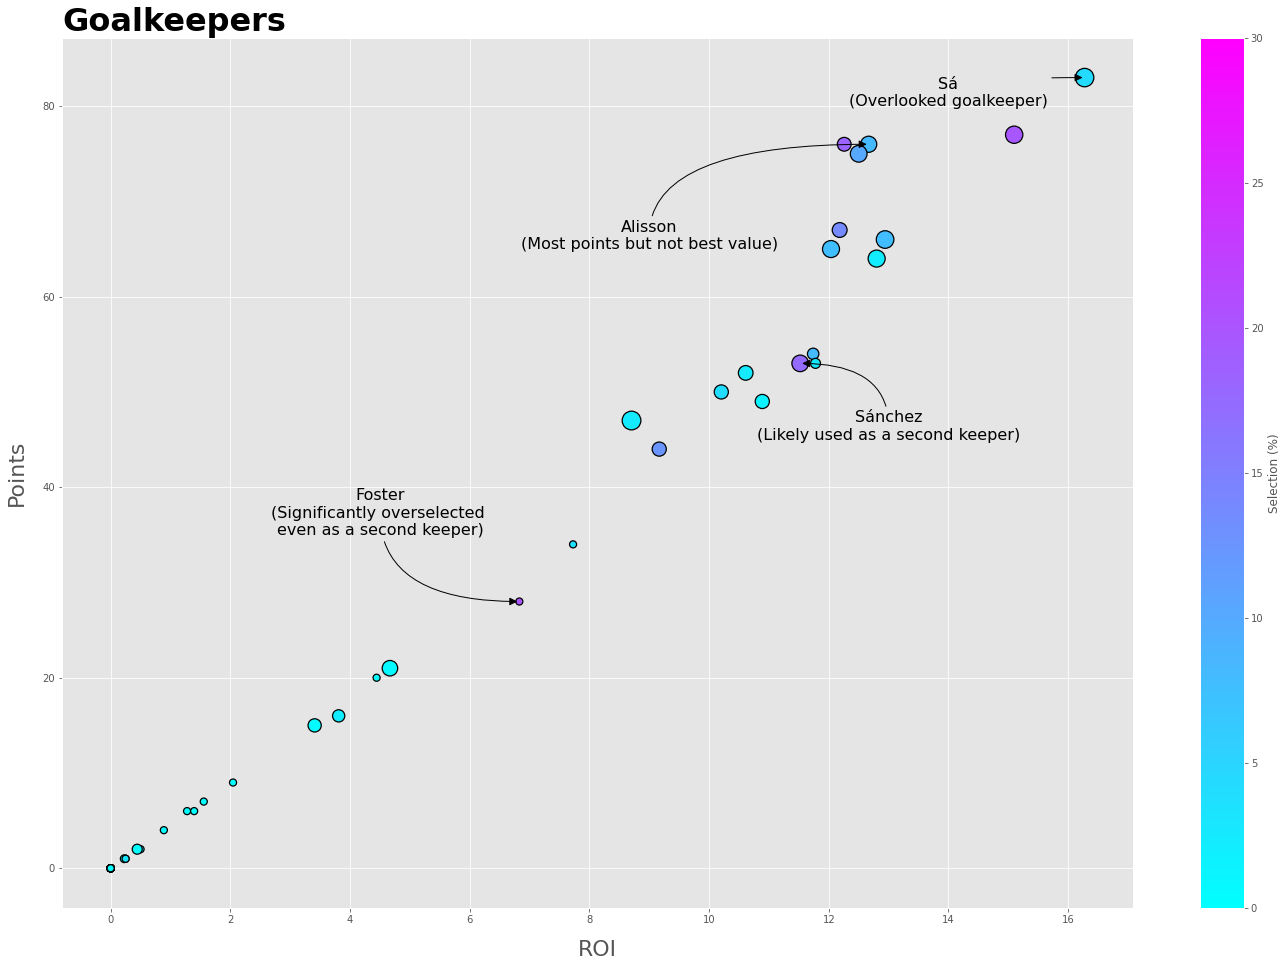

In [7]:
plt.figure(figsize=(24,16))

goalkeepers = player_data[player_data['Position'] == 'GKP']

plt.scatter(x=goalkeepers['ROI'], y=goalkeepers['Pts'], s=goalkeepers['Form']*50 +50, c=goalkeepers['Selected'], vmax=30,
           edgecolors='black', linewidth=1.25, cmap='cool')
plt.colorbar(label='Selection (%)')

player_annotate(name='Foster', x_axis='ROI', y_axis='Pts', xytext=(4.5, 35),
                annotation= "Significantly overselected \neven as a second keeper")

player_annotate(name='Sánchez', x_axis='ROI', y_axis='Pts', xytext=(13,45),
                annotation= "Likely used as a second keeper")

player_annotate(name='Sá', x_axis='ROI', y_axis='Pts', xytext=(14, 80),
                annotation= "Overlooked goalkeeper")

player_annotate(name='Alisson', x_axis='ROI', y_axis='Pts', xytext=(9, 65),
                annotation= "Most points but not best value")


plt.xlabel("ROI", fontsize=22, labelpad=15)
plt.ylabel("Points", fontsize=22, labelpad=15)
plt.title("Goalkeepers", loc='left', weight='bold', fontsize="32")

plt.show()

C:\Users\Terrafirma\anaconda3\envs\GDAL_test\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


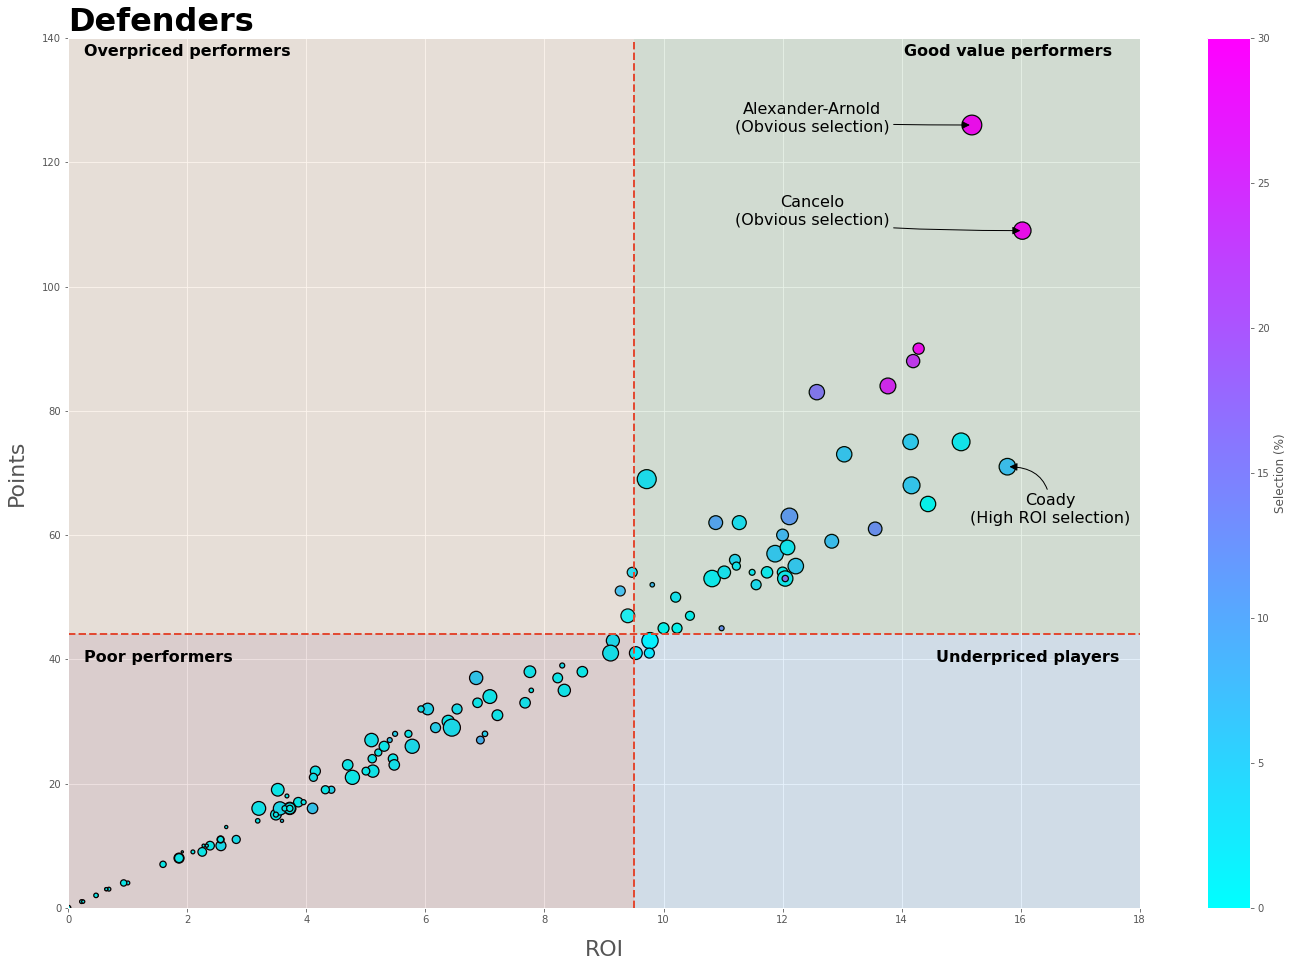

In [8]:
xlim = (0, 18)
ylim = (0, 140)
plt.figure(figsize=(24,16))

defenders = player_data[player_data['Position'] == 'DEF']

plt.scatter(x=defenders['ROI'], y=defenders['Pts'], s=defenders['Form']*50, c=defenders['Selected'], vmax=30,
           edgecolors='black', linewidth=1.25, cmap='cool')
plt.colorbar(label='Selection (%)')

player_annotate(name='Alexander-Arnold', x_axis='ROI', y_axis='Pts', xytext=(12.5, 125),
                annotation= "Obvious selection")

player_annotate(name='Cancelo', x_axis='ROI', y_axis='Pts', xytext=(12.5, 110),
                annotation= "Obvious selection")

player_annotate(name='Coady', x_axis='ROI', y_axis='Pts', xytext=(16.5, 62),
                annotation= "High ROI selection")

plt.xlabel("ROI", fontsize=22, labelpad=15)
plt.ylabel("Points", fontsize=22, labelpad=15)
plt.title("Defenders", loc='left', weight='bold', fontsize="32")

create_grid((9.5, 44), xlim, ylim)

plt.xlim(xlim)
plt.ylim(ylim)

plt.show()

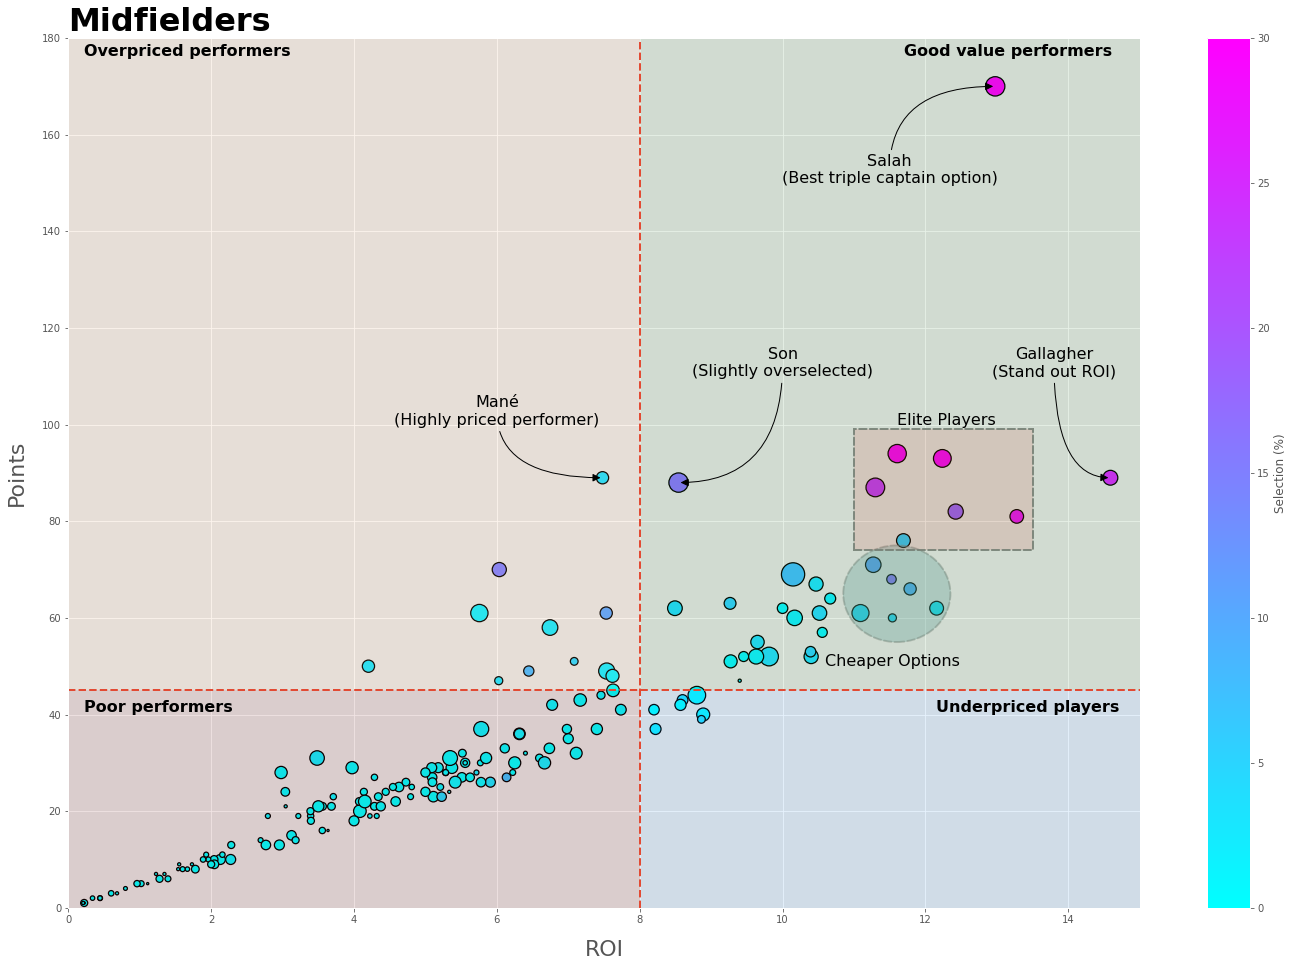

In [9]:
xlim = (0, 15)
ylim = (0, 180)
plt.figure(figsize=(24,16))
plt.style.use('ggplot')
midfielders = player_data[player_data['Position'] == 'MID']

plt.scatter(x=midfielders['ROI'], y=midfielders['Pts'], s=midfielders['Form']*50, c=midfielders['Selected'], vmax=30,
           edgecolors='black', linewidth=1.25, cmap='cool')
plt.colorbar(label='Selection (%)')

player_annotate(name='Salah', x_axis='ROI', y_axis='Pts', xytext=(11.5, 150),
                annotation= "Best triple captain option")

player_annotate(name='Gallagher', x_axis='ROI', y_axis='Pts', xytext=(13.8, 110),
                annotation= "Stand out ROI")

player_annotate(name='Mané', x_axis='ROI', y_axis='Pts', xytext=(6, 100),
                annotation= "Highly priced performer")

plt.annotate(text="Elite Players", xy=(11.6, 100), fontsize=16)

player_annotate(name='Son', x_axis='ROI', y_axis='Pts', xytext=(10, 110),
                annotation= "Slightly overselected")


ellipse = mpatches.Ellipse(xy=(11.6, 65), width=1.5, height=20, angle=0, alpha=.3, color='cadetblue')
ellipse_outline = mpatches.Ellipse(xy=(11.6, 65), width=1.5, height=20, angle=0, capstyle='round', 
                        alpha=0.4, linestyle= '--', fill=False, edgecolor='grey',linewidth=2)

plt.gca().add_patch(ellipse)
plt.gca().add_patch(ellipse_outline)

# rectangle
left, bottom, width, height = (11, 74, 2.5, 25)
rect = mpatches.Rectangle((left,bottom),width,height, capstyle='round', alpha=0.1, linestyle= '--', facecolor="red")
rect_outline= mpatches.Rectangle((left,bottom),width,height, capstyle='round', alpha=0.9, linestyle= '--',
                                  fill=False, edgecolor='grey',linewidth=2)

plt.gca().add_patch(rect)
plt.gca().add_patch(rect_outline)
plt.annotate(text="Cheaper Options", xy=(10.6, 50), fontsize=16)
create_grid((8, 45), xlim, ylim)

plt.xlabel("ROI", fontsize=22, labelpad=15)
plt.ylabel("Points", fontsize=22, labelpad=15)
plt.title("Midfielders", loc='left', weight='bold', fontsize="32")

#create scatterplot with regression line and confidence interval lines
plt.xlim(xlim)
plt.ylim(ylim)

plt.show()

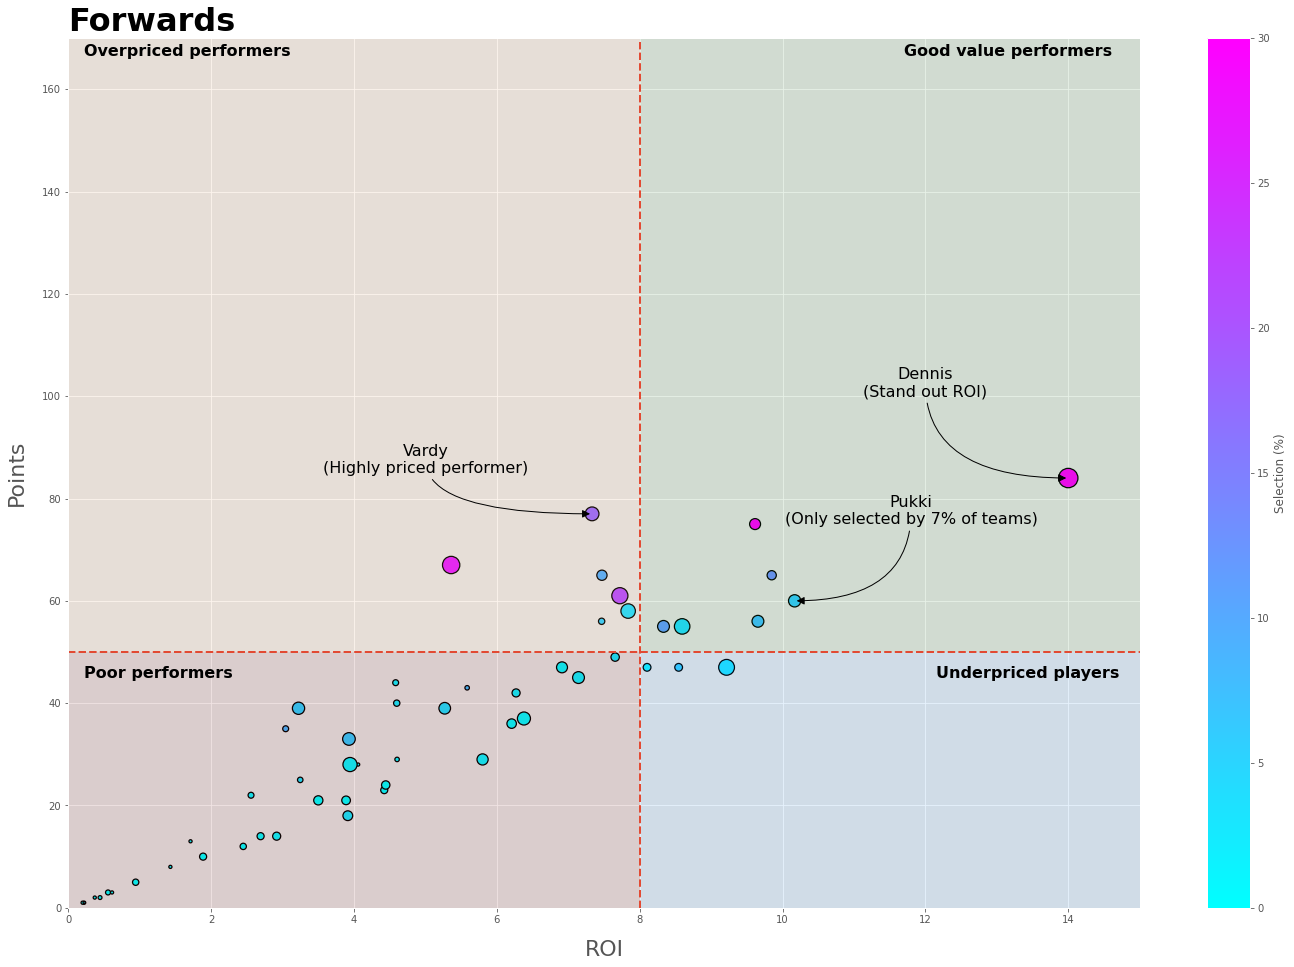

In [10]:
xlim = [0, 15]
ylim = [0, 170]
plt.figure(figsize=(24,16))

pos = player_data[player_data['Position'] == 'FWD']

plt.scatter(x=pos['ROI'], y=pos['Pts'], s=pos['Form']*50, c=pos['Selected'], vmax=30,
           edgecolors='black', linewidth=1.25, cmap='cool')
plt.colorbar(label='Selection (%)')

player_annotate(name='Dennis', x_axis='ROI', y_axis='Pts', xytext=(12, 100),
                annotation= "Stand out ROI")

player_annotate(name='Pukki', x_axis='ROI', y_axis='Pts', xytext=(11.8, 75),
                annotation= "Only selected by 7% of teams")

player_annotate(name='Vardy', x_axis='ROI', y_axis='Pts', xytext=(5, 85),
                annotation= "Highly priced performer")

create_grid((8, 50), xlim, ylim)

plt.xlabel("ROI", fontsize=22, labelpad=15)
plt.ylabel("Points", fontsize=22, labelpad=15)
plt.title("Forwards", loc='left', weight='bold', fontsize="32")

plt.xlim(xlim)
plt.ylim(ylim)
plt.show()